## Setup

In [1]:
import os
import hashlib
import pickle
import json
import time
import statistics
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Ant Colony Optimization for Specific Sequence of Districts

In [2]:
random_seed = 12

g = nx.read_gml(f"graphs/seidel_rally_graph-{random_seed}_filtered.gml")
g.nodes

NodeView(('Weinstadt', 'Klub Gru', 'Glashütte', 'Halbestadt', 'Inkognito', 'krypt.', 'Venster99', 'Baku Lounge', 'The Blue Label Bar', "P'tit Bistro Conakry", 'Polkadot', 'Wildling Foods', 'Fania Live', 'Bierkanzlei', 'The Birdyard', 'Kramladen', 'Tür 7', 'The Underdog Bar', 'Café Anno', 'Brot und Spiele', 'schwelle.wien', 'Travelshack Vienna', 'Pub by Charles', 'Hashtag 15', 'Mariahilfer Bräu', 'Café Amadeus', 'Mausi', 'Chilinos', 'Café San Marco', 'The Golden Harp', 'Tredici Gradi', 'Fortuna', 'Plus43', 'Buffalos Saloon', 'Fräuleins', 'Cafe Paris', 'DAS Biero', 'Leandra', 'Laternderl', 'Peep Show', 'Hammond', 'Basz Bar', 'Altenberg', 'New Bar', 'Prater Lounge', 'dEZENTRAl', 'The Bar', 'Pratersauna', 'The Bell', 'Tachles', 'Gasthaus Manu', 'Anton Frank - cafe bar', 'Kreuzgassenstüberl', 'Wilde Ehe', 'Bastille-Pub', 'd.e.r. Location', 'Café Trabant', 'Na-nÓg – Irish Pub', 'Einfach So', 'Oskar', 'Schlupfwinkel', 'Wiener Blut', 'Just 4 Fun', 'Schikaneder', 'Schwarzberg', 'Porto', 'Výtopn

## Modify the Graph
We have couple of constraints for this problem. First of all the order of the districts, that we start with district 23 and end in district 1, this is provided with the filtered graph structure, since each pub only has a connection to its neighboring district. Additionally by adding an artificial start and end node, the algorithm boils down to a simple shortest path computation.

In [3]:
def construct_instance(g):
    first_district_pubs = [n for n, attr in g.nodes(data=True) if attr['district'] == 1]
    last_district_pubs = [n for n, attr in g.nodes(data=True) if attr['district'] == 23]
    weights = [attr['weight'] for _, _, attr in g.edges(data=True)]
    min_weight, max_weight = min(weights), max(weights)
    
    # Construct directed graph
    dg = nx.DiGraph()
    for u, v, attr in g.edges(data=True):
        if g.nodes[u]['district'] > g.nodes[v]['district']:
            dg.add_edge(u, v, weight=(attr['weight'] - min_weight) / (max_weight - min_weight))
        else:
            dg.add_edge(v, u, weight=(attr['weight'] - min_weight) / (max_weight - min_weight))

    # Add start and end node
    dg.add_node('start')
    dg.nodes['start']['district'] = float('inf')
    dg.add_node('end')
    dg.nodes['end']['district'] = float('-inf')
    
    # Connect start and end node to graph
    for n in last_district_pubs:
        dg.add_edge('start', n, weight=0)
    
    for n in first_district_pubs:
        dg.add_edge(n, 'end', weight=0)

    return dg

dg = construct_instance(g)
dg.nodes()

NodeView(('Weinstadt', 'Polkadot', 'Wildling Foods', 'Fania Live', 'Bierkanzlei', 'The Birdyard', 'Kramladen', 'Tür 7', 'The Underdog Bar', 'Café Anno', 'Brot und Spiele', 'Rendezvous', 'Lederhosn Stadl Bar', 'Bier-Beisl', 'Sportkantine Deniz Bank Arena', 'Wienerfelder Schenke', "Guggi's Beisl", 'Bermuda WG', 'Big Ben', 'Servus Du', "Rudy's Imbiss", 'Klub Gru', 'Glashütte', 'Halbestadt', 'Inkognito', 'krypt.', 'Venster99', 'Baku Lounge', 'The Blue Label Bar', "P'tit Bistro Conakry", 'Tredici Gradi', 'Fortuna', 'Plus43', 'Buffalos Saloon', 'Fräuleins', 'Cafe Paris', 'DAS Biero', 'Leandra', 'Laternderl', 'Peep Show', 'Cafe Monaco', 'schwelle.wien', 'Cafe Bonsai', 'la Salvia', 'Derwisch', 'Velvet Palace', 'Cafe C.I.', 'Aurora', 'Weberknecht', 'Cafe Concerto', 'Megiddo', 'Biergartl', 'The Twinspub', "Pharo's Café-Pub", "Gaby's Treff", 'Travelshack Vienna', 'Pub by Charles', 'Hashtag 15', 'Mariahilfer Bräu', 'Café Amadeus', 'Mausi', 'Chilinos', 'Café San Marco', 'The Golden Harp', 'Hammond'

## Optimal Solution

In [4]:
def print_path(g, path, titel):
    path_weight = nx.path_weight(g, path, weight='weight')
    print(f"{titel} ({path_weight}):")
    for v in path:
        district = g.nodes[v]['district']
        print(f"{v}, {district}")

def find_optimal_route(dg):
    shortest_path = nx.shortest_path(dg, source='start', target='end', weight='weight')
    return shortest_path[1:-1], nx.path_weight(dg, shortest_path, weight='weight')

opt_path, opt_length = find_optimal_route(dg)
print(opt_length)
print_path(g, opt_path, "The Optimal Solution")

2.825997139679008
The Optimal Solution (20116.0):
Köö Billardcafe, 23.0
Albatros, 22.0
Star Voice Lounge, 21.0
Couch Potato, 20.0
Respawn, 19.0
Einfach So, 18.0
Espresso Karawane, 17.0
Derwisch, 16.0
Pub by Charles, 15.0
Gaby's Treff, 14.0
What's New, 13.0
Golden Harp Kaffeehaus, 12.0
Café Frog, 11.0
Guggi's Beisl, 10.0
Venster99, 9.0
Brot und Spiele, 8.0
DAS Biero, 7.0
Joanelli, 6.0
Manuela's Pub, 5.0
Schlupfwinkel, 4.0
Drinx, 3.0
Tachles, 2.0
Le Club, 1.0


## The ACO Algorithm

In [5]:
iterations = 100
ants = 100
pheromone_deposit = 1
pheromone_evaporation_rate = 0.01
alpha = 1  # Pheromone Influence
beta = 1   # Heuristic Influence
q = 0.5    # Guide Amount of Exploration

In [6]:
import itertools
from tqdm import tqdm

class AntColonySystem:
    def __init__(self, g):
        self.g = g
        self.dg = construct_instance(g)
        self.start = next((v for v in self.dg.nodes() if self.dg.in_degree(v) == 0), None)
        self.end = next((v for v in self.dg.nodes() if self.dg.out_degree(v) == 0), None)
        
        # Initialize graph-related structures
        self.potential_transition_edges = {v: self.dg.out_edges(v) for v in self.dg.nodes()}
        self.potential_transition_nodes = {v: [u for _, u in self.potential_transition_edges[v]] for v in self.dg.nodes()}
        self.desirability_of_edge = {(u, v): 1 / attr['weight'] if attr['weight'] != 0 else 1 for u, v, attr in self.dg.edges(data=True)}
        self.pheromones_of_edge = {(u, v): 1 for u, v in self.dg.edges()}

        # Initialize best solution
        self.best_path = []
        self.best_length = float('inf')
        self.best_paths = []
        self.best_lengths = []

    def filtered_choose_next_node(self, current_node):
        probs = np.array([(self.pheromones_of_edge[e]**alpha)*(self.desirability_of_edge[e]**beta) for e in self.potential_transition_edges[current_node]])
        probs = probs / probs.sum()
        if np.random.random() < q:
            return np.random.choice(self.potential_transition_nodes[current_node], p=probs)
        else:
            return self.potential_transition_nodes[current_node][np.argmax(probs)]

    def global_pheromone_update_rule(self):          
        for i in range(len(self.best_path) - 1):
            self.pheromones_of_edge[(self.best_path[i], self.best_path[i + 1])] += pheromone_deposit

    def local_pheromone_update_rule(self, edge):
        self.pheromones_of_edge[edge] = (1 - pheromone_evaporation_rate) * self.pheromones_of_edge[edge]

    def run_optimizer(self):
        for i in (pbar := tqdm(range(iterations), total=iterations, desc="Running ACO: ")):
            # Run each ant
            for ant in range(ants):
                current_node = self.start
                path = [current_node]
                while current_node != self.end:
                    next_node = self.filtered_choose_next_node(current_node)
                    path.append(next_node)
                    self.local_pheromone_update_rule((current_node, next_node))
                    current_node = next_node
                length = nx.path_weight(self.dg, path, weight='weight')
                if length < self.best_length:
                    self.best_path = path
                    self.best_length = length
        
            self.global_pheromone_update_rule()

            
            self.best_paths.append(self.best_path[1:-1])
            self.best_lengths.append(self.best_length)
            pbar.set_description(f"Current Best Solution: {self.best_length}")
        
        return self.best_paths, self.best_lengths

#np.random.seed(random_seed)
#aco = AntColonySystem(g)
#best_paths, best_lengths = aco.run_optimizer()
#print_path(g, best_paths[-1], "The Best Solution Found")

## Generate Solutions for all Test Graphs

In [ ]:
def hyperparameter_summary(iterations, ants, pheromone_evaporation_rate, pheromone_deposit, alpha, beta, q):
    summary = (
        f"iter{iterations}_ants{ants}_"
        f"evap{str(pheromone_evaporation_rate).replace('.', '')}_"
        f"dep{str(pheromone_deposit).replace('.', '')}_"
        f"alpha{str(alpha).replace('.', '')}_"
        f"beta{str(beta).replace('.', '')}_"
        f"q{str(q).replace('.', '')}"
    )
    return summary

def calc_solutions():
    hp_name = hyperparameter_summary(iterations, ants, pheromone_evaporation_rate, pheromone_deposit, alpha, beta, q)
    for i in range(1, 21):
        g = nx.read_gml(f"graphs/seidel_rally_graph-{i}_filtered.gml")
        result_file_path = f"aco_results/seidel_rally_graph-{i}_aco_results_{hp_name}.pkl"
        print(result_file_path)
        sol_paths = []
        sol_lengths = []
        sol_times = []
        if not os.path.exists(result_file_path):
            for random_seed in range(100):
                np.random.seed(random_seed)
                start_time = time.time()
                
                aco = AntColonySystem(g)
                best_paths, best_lengths = aco.run_optimizer()
                best_lengths = [nx.path_weight(g, best_path, weight='weight') for best_path in best_paths]
                
                sol_paths.append(best_paths)
                sol_lengths.append(best_lengths)
                sol_times.append(time.time() - start_time)
                
            results = [best_lengths[-1] for best_lengths in sol_lengths]
            sol_stats = [min(results), statistics.mean(results), statistics.stdev(results)]
            
            with open(result_file_path, 'wb') as f:
                pickle.dump((sol_paths, sol_lengths, sol_times, sol_stats), f)
                

calc_solutions()

aco_results/seidel_rally_graph-1_aco_results_iter100_ants100_evap001_dep1_alpha1_beta1_q05.pkl


Current Best Solution: 4.166835187057635: 100%|██████████████████████████████████████| 100/100 [00:09<00:00, 10.65it/s]


aco_results/seidel_rally_graph-2_aco_results_iter100_ants100_evap001_dep1_alpha1_beta1_q05.pkl


Current Best Solution: 3.043963712491277: 100%|██████████████████████████████████████| 100/100 [00:08<00:00, 11.17it/s]


aco_results/seidel_rally_graph-3_aco_results_iter100_ants100_evap001_dep1_alpha1_beta1_q05.pkl


Current Best Solution: 2.986607142857143: 100%|██████████████████████████████████████| 100/100 [00:08<00:00, 11.21it/s]


aco_results/seidel_rally_graph-4_aco_results_iter100_ants100_evap001_dep1_alpha1_beta1_q05.pkl


Current Best Solution: 3.1817205950007676: 100%|█████████████████████████████████████| 100/100 [00:09<00:00, 10.59it/s]


aco_results/seidel_rally_graph-5_aco_results_iter100_ants100_evap001_dep1_alpha1_beta1_q05.pkl


Current Best Solution: 5.017165149544863: 100%|██████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


aco_results/seidel_rally_graph-6_aco_results_iter100_ants100_evap001_dep1_alpha1_beta1_q05.pkl


Current Best Solution: 3.324557351809083: 100%|██████████████████████████████████████| 100/100 [00:08<00:00, 11.40it/s]


aco_results/seidel_rally_graph-7_aco_results_iter100_ants100_evap001_dep1_alpha1_beta1_q05.pkl


Current Best Solution: 3.11563647979556: 100%|███████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


aco_results/seidel_rally_graph-8_aco_results_iter100_ants100_evap001_dep1_alpha1_beta1_q05.pkl


Current Best Solution: 2.8126554726368167: 100%|█████████████████████████████████████| 100/100 [00:08<00:00, 11.20it/s]


aco_results/seidel_rally_graph-9_aco_results_iter100_ants100_evap001_dep1_alpha1_beta1_q05.pkl


Current Best Solution: 2.7547615299858337: 100%|█████████████████████████████████████| 100/100 [00:08<00:00, 11.52it/s]


aco_results/seidel_rally_graph-10_aco_results_iter100_ants100_evap001_dep1_alpha1_beta1_q05.pkl


Current Best Solution: 3.098866987428216: 100%|██████████████████████████████████████| 100/100 [00:08<00:00, 11.45it/s]


aco_results/seidel_rally_graph-11_aco_results_iter100_ants100_evap001_dep1_alpha1_beta1_q05.pkl


Current Best Solution: 2.9696488161449226: 100%|█████████████████████████████████████| 100/100 [00:10<00:00,  9.50it/s]


aco_results/seidel_rally_graph-12_aco_results_iter100_ants100_evap001_dep1_alpha1_beta1_q05.pkl


Current Best Solution: 2.9432703003337046: 100%|█████████████████████████████████████| 100/100 [00:10<00:00,  9.38it/s]


aco_results/seidel_rally_graph-13_aco_results_iter100_ants100_evap001_dep1_alpha1_beta1_q05.pkl


Current Best Solution: 2.747115384615385: 100%|██████████████████████████████████████| 100/100 [00:10<00:00,  9.49it/s]


aco_results/seidel_rally_graph-14_aco_results_iter100_ants100_evap001_dep1_alpha1_beta1_q05.pkl


Current Best Solution: 2.782774511361831: 100%|██████████████████████████████████████| 100/100 [00:10<00:00,  9.67it/s]


aco_results/seidel_rally_graph-15_aco_results_iter100_ants100_evap001_dep1_alpha1_beta1_q05.pkl


Current Best Solution: 2.8835213729540756: 100%|█████████████████████████████████████| 100/100 [00:10<00:00,  9.74it/s]


aco_results/seidel_rally_graph-16_aco_results_iter100_ants100_evap001_dep1_alpha1_beta1_q05.pkl


Current Best Solution: 2.875099316701096:  74%|████████████████████████████▊          | 74/100 [00:07<00:02, 10.30it/s]

## Plot Results

FileNotFoundError: [Errno 2] No such file or directory: 'aco_results/seidel_rally_graph-1_aco_results_iter100_ants100_evap001_dep1_alpha1_beta1_q05.pkl'

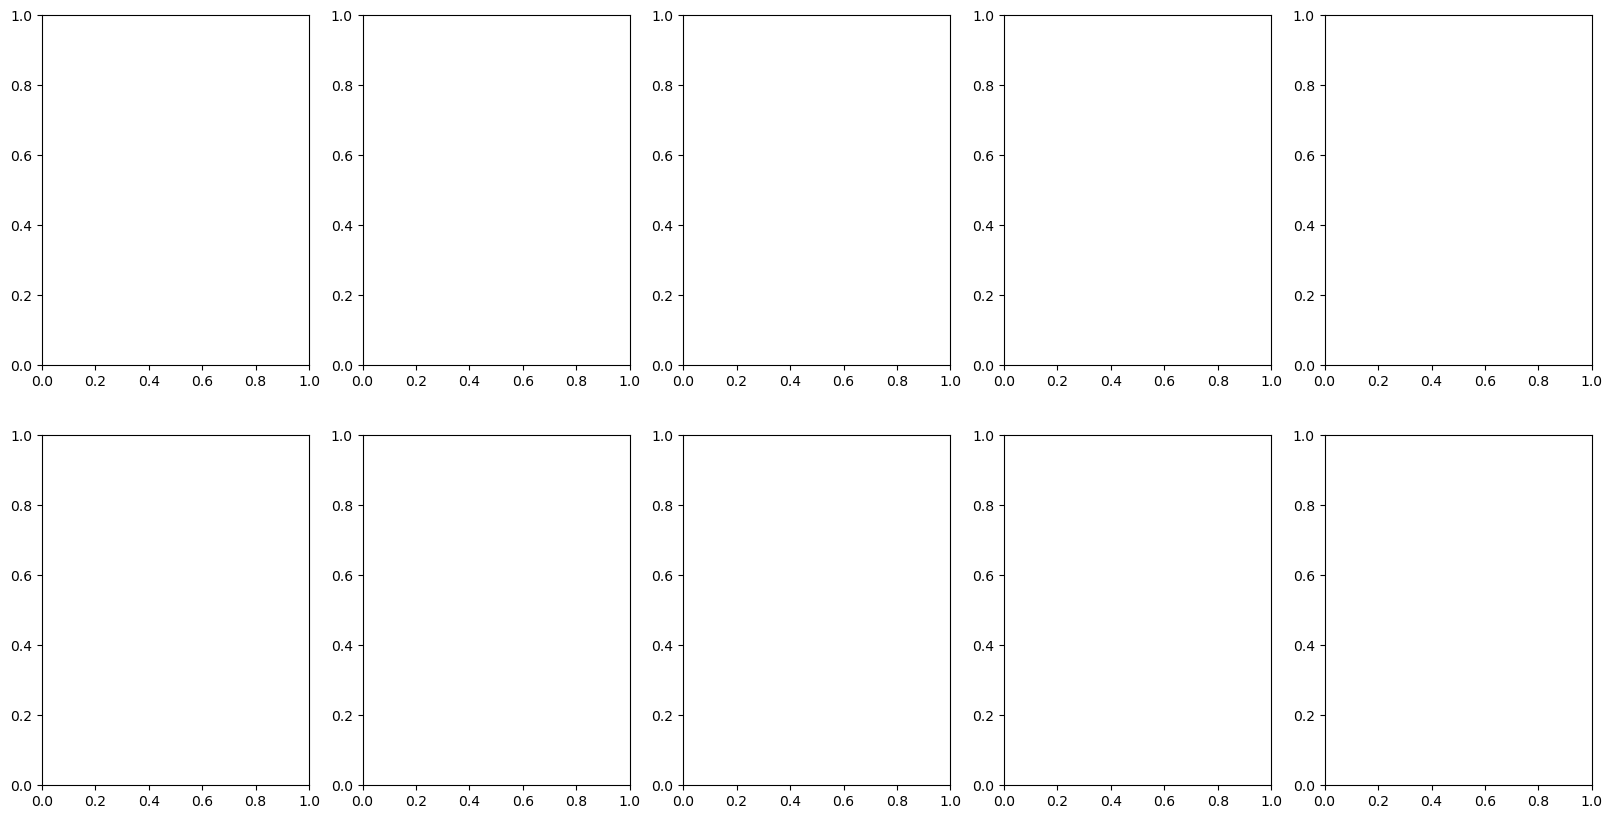

In [8]:
def plot_from_to(first, last):
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    axes = axes.flatten()
    
    hp_name = hyperparameter_summary(iterations, ants, pheromone_evaporation_rate, pheromone_deposit, alpha, beta, q)
    for i in range(first, last+1):
        g = nx.read_gml(f"graphs/seidel_rally_graph-{i}_filtered.gml")
        dg = construct_instance(g)
        opt_path, opt_length = find_optimal_route(dg)
        opt_length = nx.path_weight(g, opt_path, weight='weight')
        
        file_path = f"aco_results/seidel_rally_graph-{i}_aco_results_{hp_name}.pkl"
        with open(file_path, 'rb') as f:
            sol_paths, sol_lengths, sol_times, sol_stats = pickle.load(f)
    
        x = np.arange(iterations)
        for best_lengths in sol_lengths:
            axes[i-first].plot(x, best_lengths, label="ACO", color='black', alpha=0.1)
        axes[i-first].plot(x, [opt_length] * iterations, label="Optimal", color='red')
        
        # Add labels and title
        axes[i-first].set_xlabel("Iterations")
        axes[i-first].set_ylabel("Best Solution")
        axes[i-first].set_title(f"Seidel Rally Graph {i}")
        
    # Show the plot
    plt.tight_layout()
    plt.show()

    hp_name = hyperparameter_summary(iterations, ants, pheromone_evaporation_rate, pheromone_deposit, alpha, beta, q)
    plt.savefig(f"aco_results_graphs{first}-{last}_{hp_name}.png", format='png')

plot_from_to(1, 10)
plot_from_to(11, 20)